<a href="https://colab.research.google.com/github/ThCong/Customer-segmentation-with-RFM-and-K-means/blob/main/Customer_segmentation_with_RFM_and_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/HK6/Python/CK/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
#timestampe
print(df['InvoiceDate'].max())
print(df['InvoiceDate'].min())


2010-12-09 20:01:00
2009-12-01 07:45:00


In [ ]:
#num of order
df['Invoice'].nunique()

28816

In [ ]:
#num of customer
df['Customer ID'].nunique()

4383

In [ ]:
#num of country
df['Country'].nunique()

40

In [ ]:
#caculate monetary each order
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [ ]:
#check missing value
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [ ]:
#delete missing value
df.dropna(inplace = True) 
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [ ]:
df.duplicated().sum()


6771

In [ ]:
df=df.drop_duplicates()


In [ ]:
#get 4 main columns
df_main = df[['Customer ID','InvoiceDate','TotalPrice','Invoice']]

In [ ]:
df_main.shape

(410763, 4)

In [ ]:
df_main.describe()

,Customer ID,TotalPrice
count,410763.000000,410763.000000
mean,15353.621857,20.242465
std,1681.657665,100.710825
min,12346.000000,-25111.090000
25%,13979.000000,4.500000
50%,15311.000000,11.800000
75%,16797.000000,19.500000
max,18287.000000,15818.400000


In [ ]:
#querry positive total price 
df_main = df_main[df_main['TotalPrice']>0]

In [ ]:
df_main['InvoiceDate'] =  pd.to_datetime(df_main['InvoiceDate'], format='%Y-%m-%d')

In [ ]:
df_main.head()

,Customer ID,InvoiceDate,TotalPrice,Invoice
0,13085.0,2009-12-01 07:45:00,83.4,489434
1,13085.0,2009-12-01 07:45:00,81.0,489434
2,13085.0,2009-12-01 07:45:00,81.0,489434
3,13085.0,2009-12-01 07:45:00,100.8,489434
4,13085.0,2009-12-01 07:45:00,30.0,489434


In [ ]:
#get revenue by one order customer and return customer
df_customer = df_main.groupby(by = 'Customer ID')['Invoice'].count().reset_index()
x = df_customer[df_customer['Invoice']==1]['Customer ID']
y = df_customer[df_customer['Invoice'] > 1]['Customer ID']

df_one = df_main.merge(x)
df_one = df_one.groupby(by = 'InvoiceDate')['TotalPrice'].sum().reset_index()
df_return = df_main.merge(y)
df_return = df_return.groupby(by = 'InvoiceDate')['TotalPrice'].sum().reset_index()

df_one

,InvoiceDate,TotalPrice
0,2009-12-01 09:55:00,141.00
1,2009-12-01 10:10:00,130.00
2,2009-12-02 14:09:00,214.80
3,2009-12-04 12:31:00,20.40
4,2009-12-07 10:15:00,34.00
...,...,...
84,2010-11-30 18:46:00,10.95
85,2010-12-02 10:10:00,244.08
86,2010-12-02 17:51:00,35.40
87,2010-12-06 12:31:00,76.32


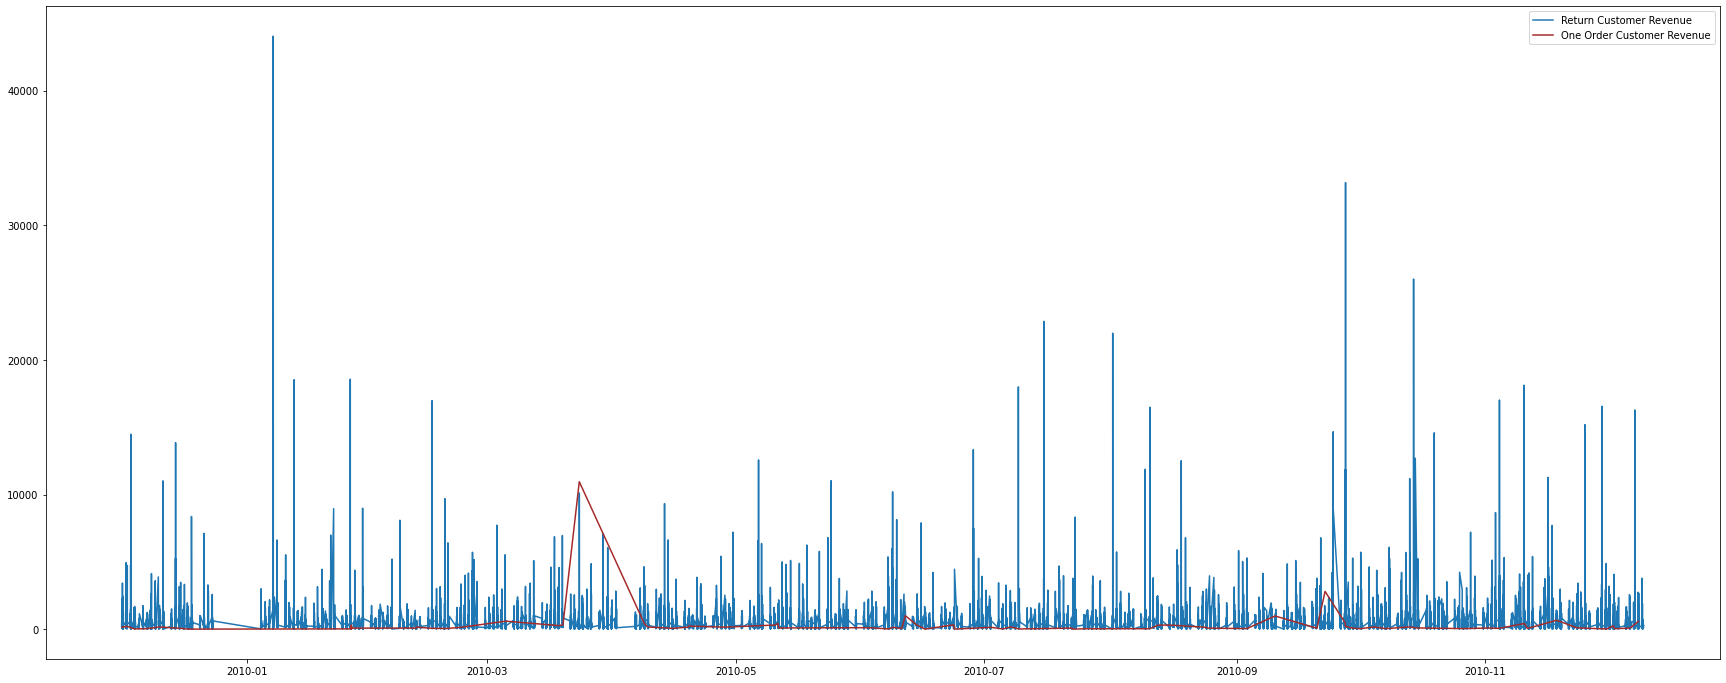

In [ ]:
plt.figure(figsize=(30, 12))
plt.plot(df_return['InvoiceDate'],df_return['TotalPrice'])
plt.plot(df_one['InvoiceDate'],df_one['TotalPrice'], c = 'brown')
plt.legend(['Return Customer Revenue', 'One Order Customer Revenue'])

# 2. RFM Segmentation 

In [ ]:
#Recency Metric
df_main['InvoiceDate'] =  pd.to_datetime(df_main['InvoiceDate'], format='%Y-%m-%d')
current_date = max(df_main['InvoiceDate']) + dt.timedelta(days=1)

#create RFM table
rfm = df_main.groupby(['Customer ID']).agg(
    {'InvoiceDate': [lambda x: (current_date- x.max()).days,
                     lambda date: (date.max() - date.min()).days],
     'Invoice':'nunique',
     'TotalPrice':'sum'
     }
).reset_index()

In [ ]:
rfm

Customer ID InvoiceDate            Invoice TotalPrice
                  <lambda_0> <lambda_1> nunique        sum
0        12346.0         165        196      11     372.86
1        12347.0           3         37       2    1323.32
2        12348.0          74          0       1     222.16
3        12349.0          43        181       3    2671.14
4        12351.0          11          0       1     300.93
...          ...         ...        ...     ...        ...
4307     18283.0          18        275       6     619.37
4308     18284.0          67          0       1     461.68
4309     18285.0         296          0       1     427.00
4310     18286.0         112        247       2    1296.43
4311     18287.0          18        188       4    2345.71

[4312 rows x 5 columns]

In [ ]:
rfm.columns =['Customer ID','Recency','T','Frequency','Monetary']
rfm.head()

,Customer ID,Recency,T,Frequency,Monetary
0,12346.0,165,196,11,372.86
1,12347.0,3,37,2,1323.32
2,12348.0,74,0,1,222.16
3,12349.0,43,181,3,2671.14
4,12351.0,11,0,1,300.93


In [ ]:
rfm[['Customer ID','Recency','Frequency','Monetary']].describe()

,Customer ID,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000,4312.000000
mean,15349.290353,91.171846,4.455705,2040.406712
std,1701.200176,96.860633,8.170213,8911.755977
min,12346.000000,1.000000,1.000000,2.950000
25%,13882.500000,18.000000,1.000000,307.187500
50%,15350.500000,53.000000,2.000000,701.615000
75%,16834.250000,136.000000,5.000000,1714.932500
max,18287.000000,374.000000,205.000000,349164.350000


In [ ]:
#caculate R,F,M score by ranking them
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])

#segment customer by RFM score
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
seg_map = {
        r'[1-2][1-2]': 'Hibernating',
        r'[1-2][3-4]': 'At Risk',
        r'[1-2]5': 'Can\'t Loose',
        r'3[1-2]': 'About to Sleep',
        r'33': 'Need Attention',
        r'[3-4][4-5]': 'Loyal Customers',
        r'41': 'Promising',
        r'51': 'New Customers',
        r'[4-5][2-3]': 'Potential Loyalists',
        r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Customer ID,Recency,T,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,165,196,11,372.86,2,5,2,252,Can't Loose
1,12347.0,3,37,2,1323.32,5,2,4,524,Potential Loyalists
2,12348.0,74,0,1,222.16,2,1,1,211,Hibernating
3,12349.0,43,181,3,2671.14,3,3,5,335,Need Attention
4,12351.0,11,0,1,300.93,5,1,2,512,New Customers


In [ ]:
#caculate mean of R,F,M by segment
rfm_segment = rfm.groupby('Segment').agg({
    'Segment': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','sum']
}).round(1).reset_index()

rfm_segment.columns = ['Segment','No of customer','Avg Recency','Avg Frequency','Avg Monetary','Sum Monetary']
rfm_segment

,Segment,No of customer,Avg Recency,Avg Frequency,Avg Monetary,Sum Monetary
0,About to Sleep,343,53.8,1.2,439.8,150865.6
1,At Risk,611,152.2,3.1,1182.6,722575.2
2,Can't Loose,77,124.1,9.1,4079.7,314134.6
3,Champions,663,7.1,12.6,6834.0,4530934.5
4,Hibernating,1015,213.9,1.1,402.5,408503.4
5,Loyal Customers,742,36.3,6.8,2732.4,2027429.9
6,Need Attention,207,53.3,2.4,1054.7,218323.3
7,New Customers,50,8.6,1.0,383.7,19183.7
8,Potential Loyalists,517,18.8,2.0,724.8,374734.9
9,Promising,87,25.7,1.0,362.6,31548.7


In [ ]:
a = rfm_segment['No of customer'].sum()
rfm_segment['No of customer'] = rfm_segment['No of customer'].apply(lambda x: (x/a*100).round(2))
b = rfm_segment['Avg Recency'].sum()
rfm_segment['Avg Recency'] = rfm_segment['Avg Recency'].apply(lambda x: (x/b*100).round(2))
c = rfm_segment['Avg Frequency'].sum()
rfm_segment['Avg Frequency'] = rfm_segment['Avg Frequency'].apply(lambda x: (x/c*100).round(2))
d = rfm_segment['Avg Monetary'].sum()
rfm_segment['Avg Monetary'] = rfm_segment['Avg Monetary'].apply(lambda x: (x/d*100).round(2))
e = rfm_segment['Sum Monetary'].sum()
rfm_segment['Sum Monetary'] = rfm_segment['Sum Monetary'].apply(lambda x: (x/e*100).round(2))

In [ ]:
rfm_segment

,Segment,No of customer,Avg Recency,Avg Frequency,Avg Monetary,Sum Monetary
0,About to Sleep,7.95,7.75,2.98,2.42,1.71
1,At Risk,14.17,21.94,7.69,6.50,8.21
2,Can't Loose,1.79,17.89,22.58,22.42,3.57
3,Champions,15.38,1.02,31.27,37.56,51.50
4,Hibernating,23.54,30.83,2.73,2.21,4.64
5,Loyal Customers,17.21,5.23,16.87,15.02,23.04
6,Need Attention,4.80,7.68,5.96,5.80,2.48
7,New Customers,1.16,1.24,2.48,2.11,0.22
8,Potential Loyalists,11.99,2.71,4.96,3.98,4.26
9,Promising,2.02,3.70,2.48,1.99,0.36


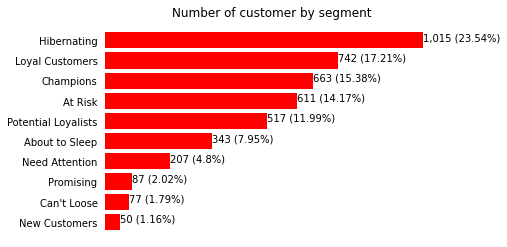

In [ ]:
#show no of customer by segment

def segmentation_plot(segment):
    seg_counts = segment.value_counts().sort_values(ascending=True)
    fig, ax = plt.subplots()

    bars = ax.barh(range(len(seg_counts)), seg_counts, color='red')
    ax.set_frame_on(False)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.set_yticks(range(len(seg_counts)))
    ax.set_yticklabels(seg_counts.index)
    ax.set_title('Number of customer by segment')
    
    for i,bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), round(value*100/a,2)))
    

segmentation_plot(rfm['Segment'])

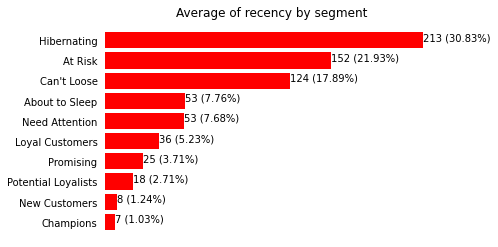

In [ ]:
#show avg of recency by segment

seg_counts = rfm.groupby(['Segment'])['Recency'].mean().sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(range(len(seg_counts)), seg_counts, color='red')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(seg_counts)))
ax.set_yticklabels(seg_counts.index)
ax.set_title('Average of recency by segment')

for i,bar in enumerate(bars):
  value = bar.get_width()
  ax.text(value,bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), round(value*100/b,2)))  


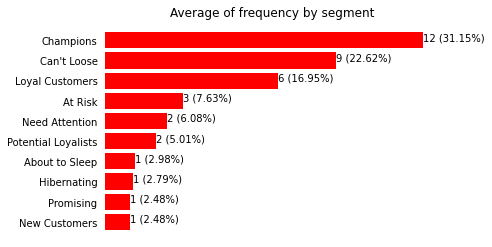

In [ ]:
#show avg of frequency by segment

seg_counts = rfm.groupby(['Segment'])['Frequency'].mean().sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(range(len(seg_counts)), seg_counts, color='red')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(seg_counts)))
ax.set_yticklabels(seg_counts.index)
ax.set_title('Average of frequency by segment')

for i,bar in enumerate(bars):
  value = bar.get_width()
  ax.text(value,bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), round(value*100/c,2)))  

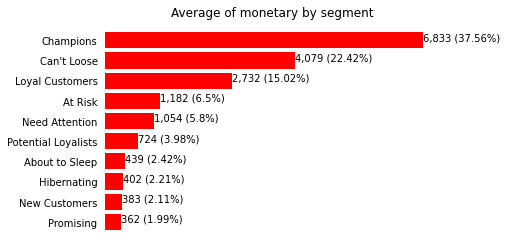

In [ ]:
#show avg of monetary by segment
seg_counts = rfm.groupby(['Segment'])['Monetary'].mean().sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(range(len(seg_counts)), seg_counts, color='red')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(seg_counts)))
ax.set_yticklabels(seg_counts.index)
ax.set_title('Average of monetary by segment')

for i,bar in enumerate(bars):
  value = bar.get_width()
  ax.text(value,bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), round(value*100/d,2)))  

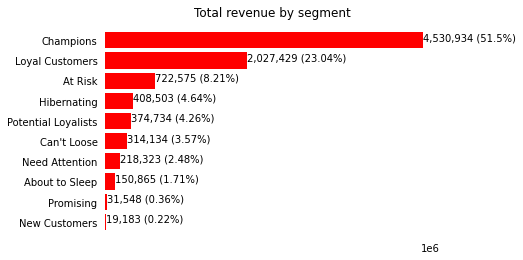

In [ ]:
#show revenue by segment

seg_counts = rfm.groupby(['Segment'])['Monetary'].sum().sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(range(len(seg_counts)), seg_counts, color='red')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(seg_counts)))
ax.set_yticklabels(seg_counts.index)
ax.set_title('Total revenue by segment')

for i,bar in enumerate(bars):
  value = bar.get_width()
  ax.text(value,bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), round(value*100/e,2)))  

# 3. K-means

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

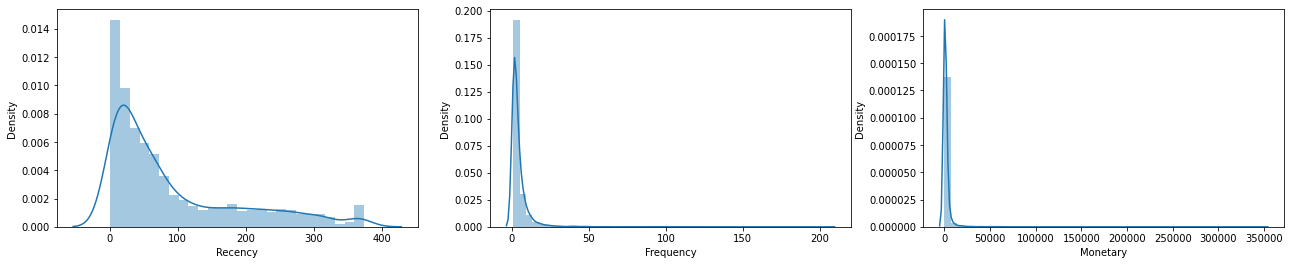

In [ ]:
# Check R,F,M distribution before using K-means

fig, ax = plt.subplots(1, 3, figsize=(22,4))
sns.distplot(rfm['Recency'], ax = ax[0])
sns.distplot(rfm['Frequency'], ax = ax[1])
sns.distplot(rfm['Monetary'], ax = ax[2])
plt.show()

In [ ]:
#checking skewness indicator by ploting and suggest 3 methods to transform outlier
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm[x].skew().round(2))
    print(np.log(rfm[x]).skew().round(2))
    print(np.sqrt(rfm[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

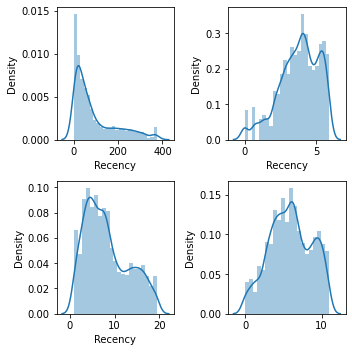

1.28
-0.61
0.59
-0.07


In [ ]:
analyze_skewness('Recency')

In [ ]:
#transform R,F,M outlier data
rfm_t = pd.DataFrame()
rfm_t['Customer ID'] = rfm['Customer ID']
rfm_t['Recency'] = stats.boxcox(rfm['Recency'])[0]
rfm_t['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_t['Monetary'] =  stats.boxcox(rfm['Monetary'])[0]

In [ ]:
rfm_t.head(5)

,Customer ID,Recency,Frequency,Monetary
0,12346.0,8.586799,1.581456,5.074686
1,12347.0,1.220710,0.610364,5.966759
2,12348.0,6.637446,0.000000,4.692244
3,12349.0,5.475524,0.900384,6.435947
4,12351.0,3.031974,0.000000,4.917674


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vars = ['Recency','Frequency','Monetary']
rfm_t[vars] = scaler.fit_transform(rfm_t[vars])



In [ ]:
rfm_t = pd.DataFrame(rfm_t)
rfm_t.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,0.980589,1.455024,-0.510718
1,12347.0,-1.712834,-0.182770,0.482232
2,12348.0,0.267805,-1.212179,-0.936406
3,12349.0,-0.157054,0.306364,1.004477
4,12351.0,-1.050542,-1.212179,-0.685485


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

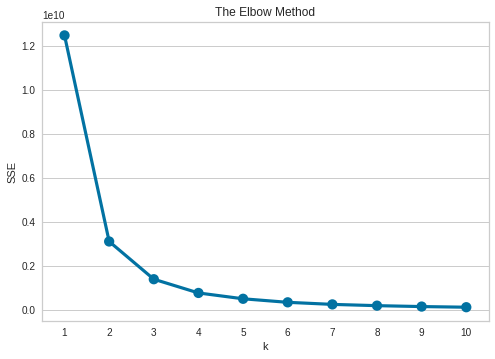

In [ ]:
# Choose cluster by Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

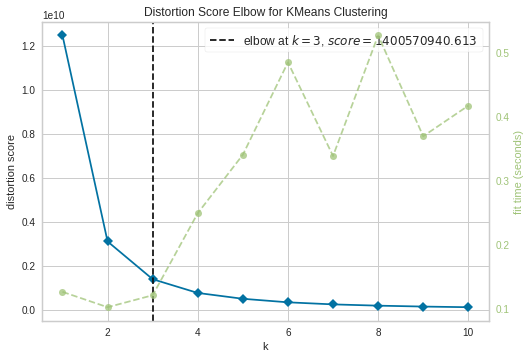

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,11))
visu.fit(rfm_t)
visu.poof();

In [ ]:
rfm_kmean = rfm[['Recency','Frequency','Monetary']]

In [ ]:
# label cluster 
kmeans = KMeans(n_clusters = 3).fit(rfm_t[vars])
rfm_kmean['Cluster_Id'] = kmeans.labels_
rfm_kmean['Customer Id'] = rfm['Customer ID']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
rfm_kmean.head()

,Recency,Frequency,Monetary,Cluster_Id,Customer Id
0,165,11,372.86,2,12346.0
1,3,2,1323.32,1,12347.0
2,74,1,222.16,0,12348.0
3,43,3,2671.14,2,12349.0
4,11,1,300.93,0,12351.0


In [ ]:
rfm_kmean_segment = rfm_kmean.groupby('Cluster_Id').agg({
    'Cluster_Id': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','sum']
}).round(1).reset_index()

rfm_kmean_segment.columns = ['Cluster_Id','No of customer','Avg Recency','Avg Frequency','Avg Monetary','Sum Monetary']
rfm_kmean_segment

,Cluster_Id,No of customer,Avg Recency,Avg Frequency,Avg Monetary,Sum Monetary
0,0,1564,158.8,1.1,292.8,458002.4
1,1,1108,18.5,11.1,5889.6,6525720.3
2,2,1640,75.8,3.2,1106.4,1814511.0


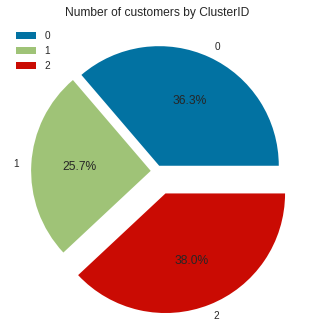

In [ ]:
explode = [0.05, 0.05, 0.2]
plt.pie(rfm_kmean_segment['No of customer'], labels = rfm_kmean_segment['Cluster_Id'],autopct='%1.1f%%',explode=explode,
pctdistance=0.6, labeldistance=1.1)
plt.title('Number of customers by ClusterID')
plt.legend()

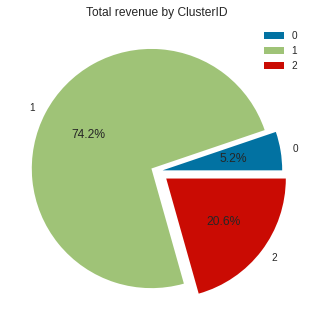

In [ ]:
explode = [0.05, 0.05, 0.1]
plt.pie(rfm_kmean_segment['Sum Monetary'], labels = rfm_kmean_segment['Cluster_Id'],autopct='%1.1f%%',explode=explode,
pctdistance=0.6, labeldistance=1.1)
plt.title('Total revenue by ClusterID')
plt.legend()

In [ ]:
rfm_normalized = pd.DataFrame(rfm_t,index=rfm_t.index,columns=rfm_t.columns)
rfm_normalized['Cluster'] = kmeans.labels_

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['Customer ID','Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,Customer ID,Cluster,Metric,Value
0,12346.0,2,Recency,0.980589
1,12347.0,1,Recency,-1.712834
2,12348.0,0,Recency,0.267805
3,12349.0,2,Recency,-0.157054
4,12351.0,0,Recency,-1.050542


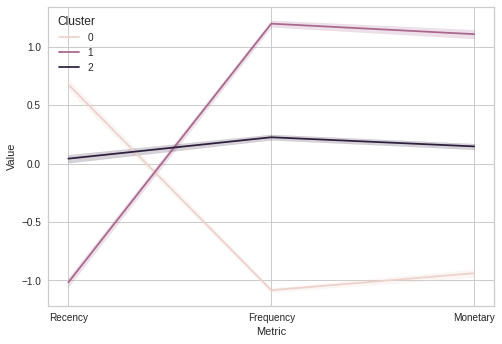

In [ ]:
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Cluster', data = rfm_melt)

Text(0, 0.5, 'Avg of Monetary')

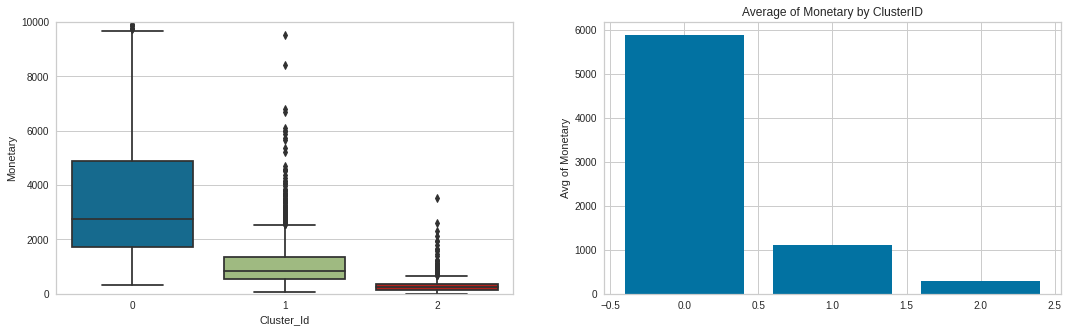

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_kmean)
plt.ylim(0,10000) 

plt.subplot(1,2,2)
plt.bar(rfm_kmean_segment['Cluster_Id'],rfm_kmean_segment['Avg Monetary'])
plt.title('Average of Monetary by ClusterID')
plt.ylabel('Avg of Monetary')

Text(0, 0.5, 'Avg of Recency')

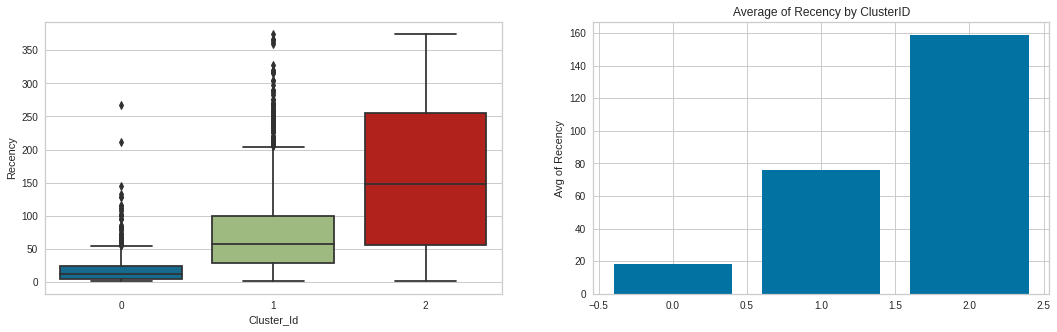

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_kmean)

plt.subplot(1,2,2)
plt.bar(rfm_kmean_segment['Cluster_Id'],rfm_kmean_segment['Avg Recency'])
plt.title('Average of Recency by ClusterID')
plt.ylabel('Avg of Recency')

Text(0, 0.5, 'Avg of Frequency')

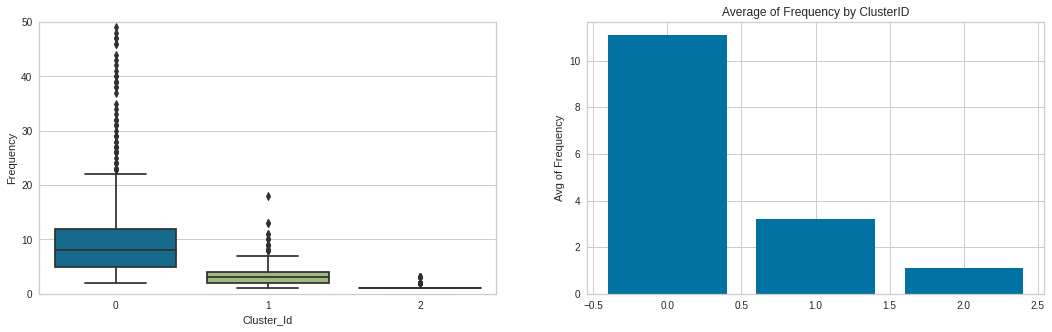

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_kmean)
plt.ylim(0,50) 


plt.subplot(1,2,2)
plt.bar(rfm_kmean_segment['Cluster_Id'],rfm_kmean_segment['Avg Frequency'])
plt.title('Average of Frequency by ClusterID')
plt.ylabel('Avg of Frequency')

In [ ]:
#review R,F,M mean by cluster, observe, rank clusters and replace cluster_id by gold,silver,bronze
rfm_kmean['Cluster_Id'] = rfm_kmean['Cluster_Id'].replace(0,'Bronze').replace(1,'Gold').replace(2,'Silver')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rfm['kmean_segment'] = rfm_kmean['Cluster_Id']
rfm

,Customer ID,Recency,T,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,kmean_segment
0,12346.0,165,196,11,372.86,2,5,2,252,Can't Loose,Silver
1,12347.0,3,37,2,1323.32,5,2,4,524,Potential Loyalists,Gold
2,12348.0,74,0,1,222.16,2,1,1,211,Hibernating,Bronze
3,12349.0,43,181,3,2671.14,3,3,5,335,Need Attention,Silver
4,12351.0,11,0,1,300.93,5,1,2,512,New Customers,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
4307,18283.0,18,275,6,619.37,4,5,3,453,Loyal Customers,Silver
4308,18284.0,67,0,1,461.68,3,2,2,322,About to Sleep,Bronze
4309,18285.0,296,0,1,427.00,1,2,2,122,Hibernating,Bronze
4310,18286.0,112,247,2,1296.43,2,3,4,234,At Risk,Silver


<Figure size 576x396 with 0 Axes>

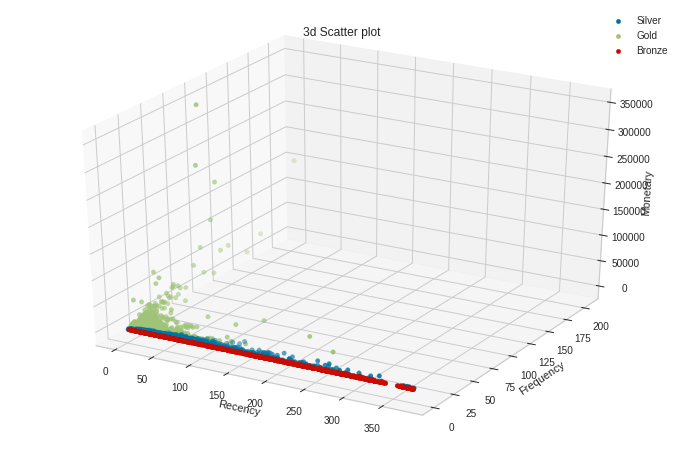

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

for s in rfm.kmean_segment.unique():
    ax.scatter(rfm.Recency[rfm.kmean_segment==s],rfm.Frequency[rfm.kmean_segment==s],rfm.Monetary[rfm.kmean_segment==s],label=s)
ax.legend()
ax.set_title('3d Scatter plot')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()


# 4. CLV


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


**Customer Lifetime Value Calculation**

In [ ]:
#caculate cltv
def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['Monetary'] / dataframe['Frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['Frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.Frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate)

    # minmaxscaler
    scaler = StandardScaler()
    dataframe["cltv_scaled"] = scaler.fit_transform(dataframe[["cltv"]])

    dataframe["cltv_segment"] = pd.qcut(dataframe["cltv"], 3, labels=["C", "B", "A"])


    return dataframe

In [ ]:
#cltv by RFM model
rfm_cltv = create_cltv_calculated(rfm)
rfm_cltv.head()

,Customer ID,Recency,T,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,kmean_segment,avg_order_value,purchase_frequency,cv,cltv,cltv_scaled,cltv_segment
0,12346.0,165,196,11,372.86,2,5,2,252,Can't Loose,Silver,33.896364,0.002551,0.086470,0.262763,-0.187139,C
1,12347.0,3,37,2,1323.32,5,2,4,524,Potential Loyalists,Gold,661.660000,0.000464,0.306892,0.932572,-0.080475,A
2,12348.0,74,0,1,222.16,2,1,1,211,Hibernating,Bronze,222.160000,0.000232,0.051521,0.156561,-0.204052,C
3,12349.0,43,181,3,2671.14,3,3,5,335,Need Attention,Silver,890.380000,0.000696,0.619467,1.882410,0.070784,A
4,12351.0,11,0,1,300.93,5,1,2,512,New Customers,Bronze,300.930000,0.000232,0.069789,0.212072,-0.195212,C


In [ ]:
rfm_cltv['cltv'].describe()

count    4312.000000
mean        1.437919
std         6.280307
min         0.002079
25%         0.216482
50%         0.494443
75%         1.208550
max       246.063672
Name: cltv, dtype: float64

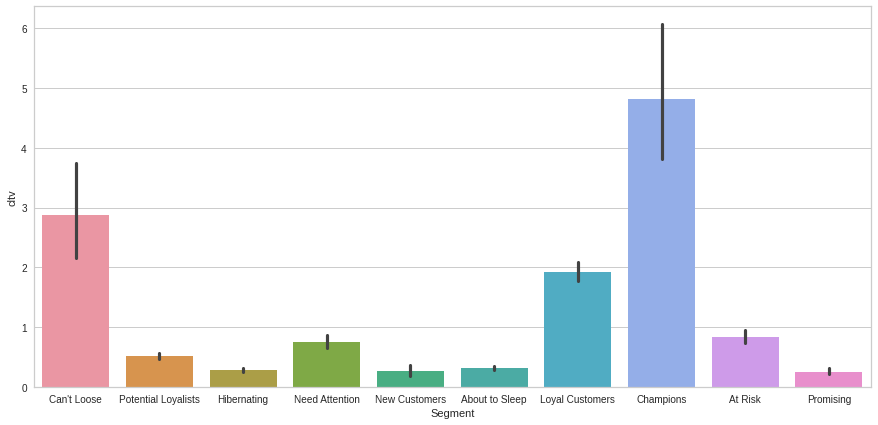

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Segment", y="cltv", data=rfm_cltv)

CLTV:

- Champions has the highest CLTV.
- Hibernating, New Customers, About to Sleep, Promising have the lowest CLTV.

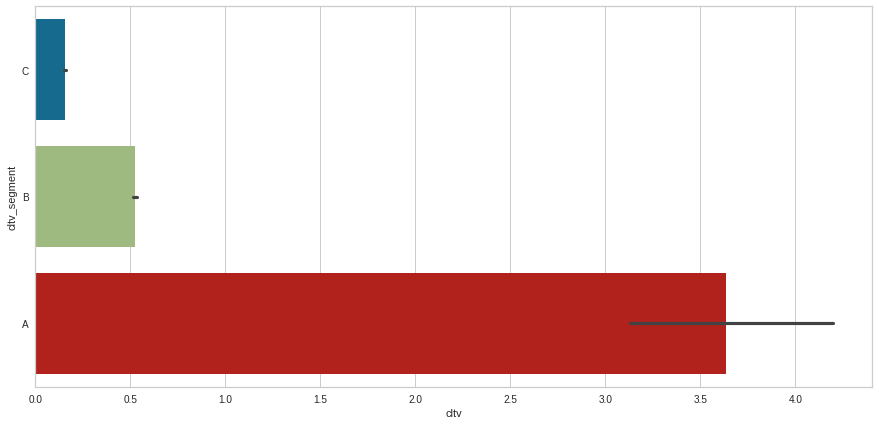

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv", y="cltv_segment", data=rfm_cltv)

**Customer Lifetime Value Prediction**

In [ ]:
!pip install lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 4.9 MB/s 


In [ ]:
cltv_df = df_main.groupby('Customer ID').agg({'InvoiceDate': [lambda invoice_date: (invoice_date.max() - invoice_date.min()).days,
                                                        lambda invoice_date: (current_date - invoice_date.min()).days], 
                                        'Invoice': lambda invoice: invoice.nunique(),
                                        'TotalPrice': lambda total_price: total_price.sum()})

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,196,361,11,372.86
12347.0,37,40,2,1323.32
12348.0,0,74,1,222.16
12349.0,181,225,3,2671.14
12351.0,0,11,1,300.93


In [ ]:
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

In [ ]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [ ]:
# BG/NBD
bgf = BetaGeoFitter(penalizer_coef=0.001) #avoid overfitting

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2893 subjects, a: 0.14, alpha: 10.85, b: 2.72, r: 2.13>

In [ ]:
#top 10 customers do the most purchases in the next 6 months
x = bgf.conditional_expected_number_of_purchases_up_to_time(4*6,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).reset_index()
x.columns = ['Customer ID', 'Expected No of Transaction']

x.head(10)

,Customer ID,Expected No of Transaction
0,14911.0,75.445031
1,17850.0,56.908445
2,12748.0,53.533404
3,15311.0,44.828956
4,13089.0,40.429368
5,14606.0,38.029900
6,14156.0,37.634296
7,13694.0,34.825725
8,17841.0,33.967882
9,18102.0,33.165017


In [ ]:
#Total Expected Number of Transaction (6 Month)
bgf.predict(4*6,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

10443.774543709731

In [ ]:
cltv_df["Expected_Purchase_6month"] = bgf.predict(6 * 4,
                                           cltv_df['frequency'],
                                           cltv_df['recency'],
                                           cltv_df['T'])

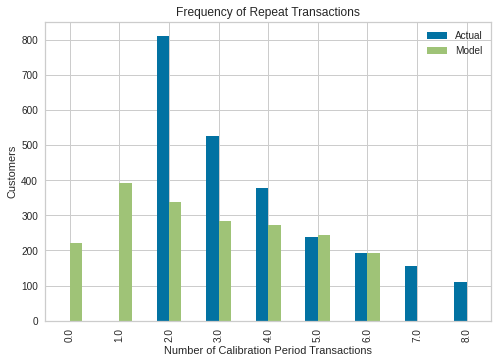

In [ ]:
#plot to compare number of actual transactions and number of predict transactions 
plot_period_transactions(bgf)
plt.show()

No handles with labels found to put in legend.


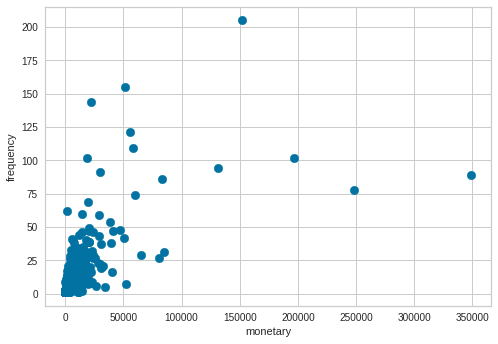

In [ ]:
# The correlation seems very weak. 
plt.scatter(rfm_cltv.Monetary,rfm_cltv.Frequency,s=75)
plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [ ]:
# Gamma Gamma
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])


<lifetimes.GammaGammaFitter: fitted with 2893 subjects, p: 3.26, q: 0.22, v: 3.19>

In [ ]:
#Who are the 10 highest revenue customers?

y = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).reset_index()

y.columns = ['Customer ID', 'Expected Average Revenue Order']

y.head(10)

,Customer ID,Expected Average Revenue Order
0,18102.0,350109.382354
1,14646.0,249163.914780
2,14156.0,197013.765824
3,14911.0,152299.704108
4,13694.0,131779.997613
5,17511.0,85201.513374
6,15061.0,83517.707372
7,16684.0,81211.885561
8,16754.0,66047.288607
9,17949.0,60313.436901


In [ ]:
y['Expected Average Revenue Order'].sum()

8594949.15628572

In [ ]:
#
cltv_df["Expected_Average_Profit_6months"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])
cltv_df.head()


,recency,T,frequency,monetary,Expected_Average_Profit_6months
Customer ID,,,,,
12346.0,28.000000,51.571429,11,372.86,381.481364
12347.0,5.285714,5.714286,2,1323.32,1505.779173
12349.0,25.857143,32.142857,3,2671.14,2904.806074
12352.0,2.285714,4.000000,2,343.80,392.546563
12356.0,6.285714,8.571429,3,3560.30,3871.362789


**CLTV Prediction with BG-NBD & Gamma-Gamma Model:**

In [ ]:
#predict cltv in the next 6 months
cltv_6_months = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=6,  # 6 months
                                   freq="W",  
                                   discount_rate=0.01)

In [ ]:
cltv_6_months

Customer ID
12346.0      294.871740
12347.0     8379.811477
12349.0     7877.798646
12352.0     2373.577812
12356.0    22712.477675
               ...     
18276.0     3725.650369
18277.0     5297.285116
18283.0     2359.470846
18286.0     2125.526243
18287.0     8835.214999
Name: clv, Length: 2893, dtype: float64

In [ ]:
cltv_6_months = cltv_df.merge(cltv_6_months, on="Customer ID", how="left")
cltv_6_months.rename(columns={"clv": "CLTV_6_months"}, inplace=True)
cltv_6_months.head()

,recency,T,frequency,monetary,Expected_Average_Profit_6months,CLTV_6_months
Customer ID,,,,,,
12346.0,28.000000,51.571429,11,372.86,381.481364,294.871740
12347.0,5.285714,5.714286,2,1323.32,1505.779173,8379.811477
12349.0,25.857143,32.142857,3,2671.14,2904.806074,7877.798646
12352.0,2.285714,4.000000,2,343.80,392.546563,2373.577812
12356.0,6.285714,8.571429,3,3560.30,3871.362789,22712.477675


In [ ]:
#Scaling CLTV Values
scaler = StandardScaler()
scaler.fit(cltv_6_months[["CLTV_6_months"]])
cltv_6_months["Scaled_CLTV"] = scaler.transform(cltv_6_months[["CLTV_6_months"]])

In [ ]:
#Assigning Segments Based on CLTV
cltv_6_months["CLTV_Segment"] = pd.qcut(cltv_6_months["Scaled_CLTV"], 3, labels=["C", "B", "A"])
cltv_6_months.reset_index(inplace=True)
cltv_6_months.sort_values(by="Scaled_CLTV", ascending=False).head(10)


,Customer ID,recency,T,frequency,monetary,Expected_Average_Profit_6months,CLTV_6_months,Scaled_CLTV,CLTV_Segment
2827,18102.0,53.285714,53.428571,89,349164.35,350109.382354,1.216358e+07,29.870884,A
1229,14911.0,53.285714,53.428571,205,152121.22,152299.704108,1.203672e+07,29.558415,A
846,14156.0,52.285714,53.428571,102,196549.74,197013.765824,7.767087e+06,19.042191,A
1096,14646.0,51.714286,53.285714,78,248396.50,249163.914780,7.544366e+06,18.493625,A
616,13694.0,51.571429,53.000000,94,131443.19,131779.997613,4.807549e+06,11.752768,A
2703,17850.0,51.714286,52.857143,155,51208.87,51288.378999,3.057518e+06,7.442396,A
1300,15061.0,53.000000,53.428571,86,83284.38,83517.707372,2.803255e+06,6.816138,A
1425,15311.0,53.285714,53.428571,121,55942.74,56054.051769,2.632350e+06,6.395195,A
325,13089.0,52.571429,53.285714,109,57885.45,58013.334319,2.456979e+06,5.963251,A
2752,17949.0,52.285714,53.285714,74,60117.60,60313.436901,1.746814e+06,4.214095,A


In [ ]:
cltv_6_months.shape

(2893, 9)

In [ ]:
cltv_segment = cltv_6_months.groupby("CLTV_Segment").agg({'CLTV_Segment': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean','sum']    
}).reset_index()
cltv_segment.columns = ['CLTV_Segment','No of customer','Avg Recency','Avg Frequency','Avg Monetary','Sum Monetary']
cltv_segment

,CLTV_Segment,No of customer,Avg Recency,Avg Frequency,Avg Monetary,Sum Monetary
0,C,965,20.903331,2.773057,655.998167,633038.231
1,B,964,27.244369,3.971992,1312.729129,1265470.880
2,A,964,37.456283,11.710581,6642.552032,6403420.159


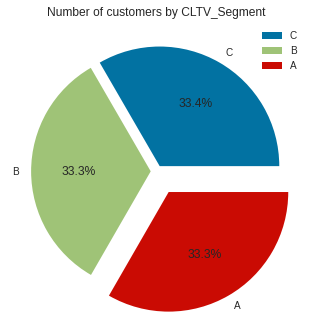

In [ ]:
explode = [0.05, 0.05, 0.2]
plt.pie(cltv_segment['No of customer'], labels = cltv_segment['CLTV_Segment'],autopct='%1.1f%%',explode=explode,
pctdistance=0.6, labeldistance=1.1)
plt.title('Number of customers by CLTV_Segment')
plt.legend()

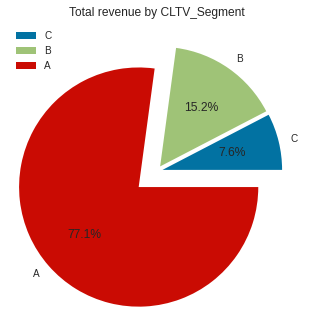

In [ ]:
explode = [0.05, 0.05, 0.2]
plt.pie(cltv_segment['Sum Monetary'], labels = cltv_segment['CLTV_Segment'],autopct='%1.1f%%',explode=explode,
pctdistance=0.6, labeldistance=1.1)
plt.title('Total revenue by CLTV_Segment')
plt.legend()

In [ ]:
data = go.Bar(x = cltv_6_months.groupby('CLTV_Segment').agg({'CLTV_6_months':'mean'}).reset_index()['CLTV_Segment'],
              y = cltv_6_months.groupby('CLTV_Segment').agg({'CLTV_6_months':'mean'}).reset_index()['CLTV_6_months'],
              text = round(cltv_6_months.groupby('CLTV_Segment').agg({'CLTV_6_months':'mean'}).reset_index()['CLTV_6_months'],3),
              textposition= 'auto',
              marker = dict(color = 'darkorange'))

layout = go.Layout(title={'text': "Average CLV by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Segment'),
                   yaxis =dict(title='CLV'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_yaxes()
iplot(fig)